<a href="https://colab.research.google.com/github/brunotagoncalves/publicdataml/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.	Feature engineering


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd_df = pd.read_csv('drive/MyDrive/publicdataml/sample_data_v1.csv',index_col=0,dtype='object')

In [5]:
pd_df.subclasse = pd_df.subclasse.str.zfill(7)
for i in range(1,pd_df.subclasse.str.len().max()):
  pd_df.loc[:,'subclasse_dig'+str(i)] = pd_df.loc[:,'subclasse'].str[:i]  

In [6]:
pd_df.loc[:,'cbo2002ocupação'] = pd_df.loc[:,'cbo2002ocupação'].str.zfill(6)
for i in range(1,pd_df.loc[:,'cbo2002ocupação'].str.len().max()):
  pd_df.loc[:,'cbo_dig'+str(i)] = pd_df.loc[:,'cbo2002ocupação'].str[:i]  

In [7]:
for i in range(3,pd_df.loc[:,'município'].str.len().max()):
  pd_df.loc[:,'município_dig'+str(i)] = pd_df.loc[:,'município'].str[:i]  

In [11]:
pd_df.loc[:,'salário'] = pd_df.loc[:,'salário'].astype('float')
pd_df.loc[:,'idade'] = pd_df.loc[:,'idade'].astype('int')
pd_df.loc[:,'pop_estimada'] = pd_df.loc[:,'pop_estimada'].astype('float')
pd_df.loc[:,'horascontratuais'] = pd_df.loc[:,'horascontratuais'].astype('int')


In [12]:
pd_df.groupby(['graudeinstrução','Descrição_graudeinstrução'])['salário'].describe().sort_values('mean') # não parece ordinal

,,count,mean,std,min,25%,50%,75%,max
graudeinstrução,Descrição_graudeinstrução,,,,,,,,
6,Médio Incompleto,28741.0,1032.004788,1741.373317,400.0,522.5000,624.000,1143.9300,49500.00
4,6ª a 9ª Fundamental,11558.0,1344.680383,1354.916347,400.0,654.7300,1096.350,1551.0000,47500.00
1,Analfabeto,797.0,1378.250652,1274.655924,400.0,1045.0000,1060.490,1391.0000,24200.00
2,Até 5ª Incompleto,4751.0,1482.551292,1382.176362,400.0,1045.0000,1163.550,1619.8700,35602.80
5,Fundamental Completo,16818.0,1566.155659,1902.855373,400.0,1039.0000,1239.000,1714.0000,49500.00
3,5ª Completo Fundamental,3661.0,1574.430322,1549.472927,400.0,1045.0000,1212.000,1716.0000,39000.00
7,Médio Completo,132792.0,1602.718024,1887.433051,400.0,998.0000,1191.865,1678.1675,49500.00
8,Superior Incompleto,11295.0,2035.253167,2206.561207,400.0,903.0150,1370.300,2699.0000,49093.00
9,Superior Completo,33997.0,4396.923517,4195.914499,400.0,2000.0000,3324.000,5153.3700,50000.00


In [13]:
pd_df.dtypes

município                     object
tamestabjan                   object
raçacor                       object
sexo                          object
graudeinstrução               object
cbo2002ocupação               object
categoria                     object
subclasse                     object
seção                         object
uf                            object
região                        object
competência                   object
saldomovimentação             object
idade                          int64
horascontratuais               int64
tipoempregador                object
tipoestabelecimento           object
tipomovimentação              object
tipodedeficiência             object
indtrabintermitente           object
indtrabparcial                object
salário                      float64
indicadoraprendiz             object
fonte                         object
faixapnad                     object
Descrição_região              object
Descrição_uf                  object
D

In [14]:
pd_df.groupby('horascontratuais')['salário'].describe().sort_values('mean',ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
horascontratuais,,,,,,,,
59,17.0,8574.595882,10998.965888,485.19,1372.8000,2722.000,10262.9300,39600.00
0,8079.0,5942.260926,5754.127792,400.00,1824.1350,5313.000,7379.8750,49500.00
40,15025.0,4535.172856,4433.759520,400.00,1607.7600,3291.000,5734.5900,49231.00
57,7.0,3596.641429,2974.636052,1125.00,1176.9450,1721.460,5926.9900,8122.16
37,302.0,3276.490132,3467.670180,424.08,1129.3950,1925.840,3874.7500,23173.38
56,172.0,3203.789826,3350.704037,432.60,1093.5225,1836.430,4098.8200,22400.00
49,216.0,3168.670417,3709.680438,553.71,1045.0000,1508.310,3404.8950,25231.05
41,613.0,2976.368140,3092.191362,429.10,1250.0000,2184.000,3448.6800,36570.00
11,179.0,2809.535698,5741.764825,400.00,532.9400,699.830,3588.8500,40500.00


In [15]:

#pd_df.loc[:,'salário']
pd_df.loc[pd_df.loc[:,'horascontratuais']<20,'horascontratuais'] = pd_df.horascontratuais.median()

In [16]:
pd_df.loc[:,'valorhora'] = pd_df.loc[:,'salário']/pd_df.horascontratuais
pd_df.loc[:,'valorhora'].describe()

count    250307.000000
mean         50.946691
std          67.731855
min           4.042121
25%          24.541500
50%          30.431818
75%          47.604318
max        2470.000000
Name: valorhora, dtype: float64

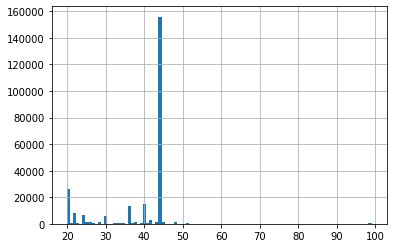

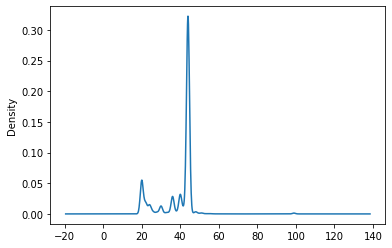

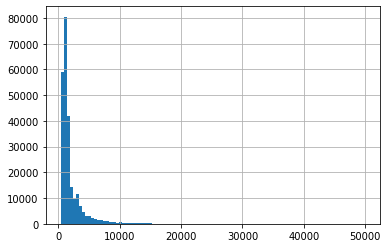

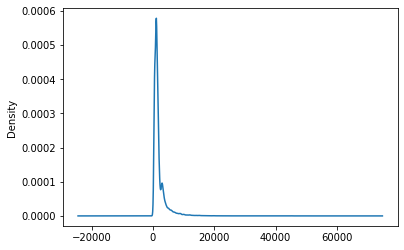

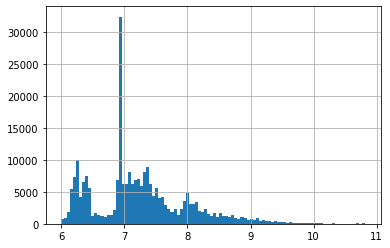

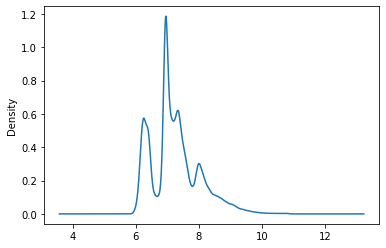

In [17]:
pd_df.horascontratuais.hist(bins=100)
plt.show()
pd_df.horascontratuais.plot.density()
plt.show()
pd_df.loc[:,'salário'].hist(bins=100)
plt.show()
pd_df.loc[:,'salário'].plot.density()
plt.show()
np.log1p(pd_df.loc[:,'salário']).hist(bins=100)
plt.show()
np.log1p(pd_df.loc[:,'salário']).plot.density()
plt.show()

In [18]:
cat_cols = pd_df.columns[pd_df.columns.str.contains('Descrição|dig')].tolist()
int_cols = pd_df.columns[pd_df.columns.str.contains('idade|pop_')].tolist()
target_cols = pd_df.columns[pd_df.columns.str.contains('salário|valor')].tolist()
key_cols = pd_df.columns[pd_df.columns.str.contains('faixapnad')].tolist()

In [19]:
pd_df.loc[:,cat_cols+int_cols+key_cols+target_cols].to_csv('drive/MyDrive/publicdataml/sample_data_featured_v1.csv')

In [29]:
import pandas as pd 
pd_df = pd.read_csv('drive/MyDrive/publicdataml/sample_data_featured_v1.csv',index_col=0)

In [30]:
cat_cols = pd_df.columns[pd_df.columns.str.contains('Descrição|dig')].tolist()
int_cols = pd_df.columns[pd_df.columns.str.contains('idade|pop_')].tolist()
target_cols = pd_df.columns[pd_df.columns.str.contains('salário')].tolist()
key_cols = pd_df.columns[pd_df.columns.str.contains('faixapnad')].tolist()
df = pd_df.loc[:,cat_cols+int_cols+key_cols+target_cols]


In [31]:
df.loc[:,cat_cols+int_cols+target_cols].to_csv('drive/MyDrive/publicdataml/sample_data_featured_v2.csv')

In [32]:
df.loc[:,cat_cols] = df.loc[:,cat_cols].applymap(lambda x : "'" + str(x) + "'")
df.loc[:,cat_cols+int_cols+target_cols].to_csv('drive/MyDrive/publicdataml/sample_data_featured_v3.csv',index=False)

In [33]:
df.loc[:,cat_cols+int_cols+target_cols].head()

,Descrição_região,Descrição_uf,Descrição_município,Descrição_seção,Descrição_subclasse,Descrição_categoria,Descrição_cbo2002ocupação,Descrição_graudeinstrução,Descrição_sexo,Descrição_raçacor,Descrição_tamestabjan,subclasse_dig1,subclasse_dig2,subclasse_dig3,subclasse_dig4,subclasse_dig5,subclasse_dig6,cbo_dig1,cbo_dig2,cbo_dig3,cbo_dig4,cbo_dig5,município_dig3,município_dig4,município_dig5,idade,pop_estimada,salário
0,'Norte','Rondônia','Ro-Espigao D Oeste','Indústrias de Transformação','Abate de Aves','Empregado - Aprendiz',"'Auxiliar de Escritorio, em Geral'",'Médio Completo','Mulher','Branca','De 500 a 999 vínculos','1','10','101','1012','10121','101210','4','41','411','4110','41100','110','1100','11000',18,32695.0,750.0
1,'Norte','Rondônia','Ro-Espigao D Oeste','Indústrias de Transformação','Abate de Aves',"'Empregado - Geral, inclusive o empregado públ...",'Trabalhador da Avicultura de Corte','6ª a 9ª Fundamental','Homem','Parda','De 500 a 999 vínculos','1','10','101','1012','10121','101210','6','62','623','6233','62330','110','1100','11000',20,32695.0,1316.0
2,'Norte','Rondônia','Ro-Espigao D Oeste','Indústrias de Transformação','Abate de Aves',"'Empregado - Geral, inclusive o empregado públ...",'Lavador de Roupas a Maquina','6ª a 9ª Fundamental','Mulher','Parda','De 500 a 999 vínculos','1','10','101','1012','10121','101210','5','51','516','5163','51631','110','1100','11000',29,32695.0,1104.0
3,'Norte','Rondônia','Ro-Espigao D Oeste','Indústrias de Transformação','Abate de Aves','Empregado - Aprendiz',"'Auxiliar de Escritorio, em Geral'",'Médio Completo','Mulher','Preta','De 500 a 999 vínculos','1','10','101','1012','10121','101210','4','41','411','4110','41100','110','1100','11000',19,32695.0,750.0
4,'Norte','Rondônia','Ro-Espigao D Oeste',"'Comércio, Reparação de Veículos Automotores e...",'Comércio Varejista de Combustíveis para Veícu...,"'Empregado - Geral, inclusive o empregado públ...",'Faxineiro (Desativado em 2010)','Médio Completo','Homem','Não informada','De 20 a 49 vínculos','4','47','473','4731','47318','473180','5','51','514','5143','51432','110','1100','11000',19,32695.0,1045.0
